In [4]:
import pandas as pd
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.shape

(1453, 15)

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [16]:
import numpy as np

MD_x = df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
result = np.round(np.mean(MD_x, axis=0), 2)
dict(zip(df.columns[0:11], result))

{'yummy': 0.55,
 'convenient': 0.91,
 'spicy': 0.09,
 'fattening': 0.87,
 'greasy': 0.53,
 'fast': 0.9,
 'cheap': 0.6,
 'tasty': 0.64,
 'expensive': 0.36,
 'healthy': 0.2,
 'disgusting': 0.24}

In [31]:
from sklearn.decomposition import PCA


MD_pca = PCA()
MD_pca.fit(MD_x)

# Accessing the summary of the PCA results
summary = {
    'Standard deviation': MD_pca.explained_variance_ ** 0.5,
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
}

pd.DataFrame(summary, index=['PC{}'.format(i+1) for i in range(11)])



,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


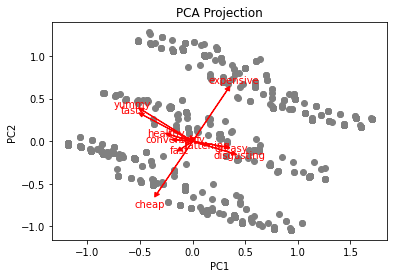

In [53]:
import matplotlib.pyplot as plt

# Predicted values
predicted_values = MD_pca.transform(MD_x)

# Plot predicted values
plt.scatter(predicted_values[:, 0], predicted_values[:, 1], color='grey')

# Plot projection axes
projection_axes = MD_pca.components_.T
for i in range(projection_axes.shape[0]):
    plt.arrow(0, 0, projection_axes[i, 0], projection_axes[i, 1], head_width=0.05, head_length=0.05, fc='red', ec='red', width= 0.005)
    plt.text(projection_axes[i, 0]*1.2, projection_axes[i, 1]*1.2, df.columns[i], color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()
